In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggstyle')

In [1]:
from uniprobe_data import *
from sqlalchemy import func
from sqlalchemy import distinct

In [4]:
import networkx as nx
import numpy as np

In [5]:
bind_net = dict()
for gene_data in session.query(GeneData):
    bind_net[gene_data.uniprot] =\
        set(nx.read_gpickle('graphs/' + str(gene_data.gene_info.genes[0].gene_id) + '.escore0.35.pickle.bz2').nodes())

/usr/local/lib/python2.7/dist-packages/sqlalchemy/orm/strategies.py:608: SAWarning: Multiple rows returned with uselist=False for lazily-loaded attribute 'GeneData.gene_info' 
  % self.parent_property)


In [41]:
lo_escore_hi_dist = [['Q62231', 'Q9Y1P6'],
                     ['Q62233', 'Q9Y1P6'],
                     ['Q03125', 'P38082'],
                     ['P34056', 'Q6VUP9'],
                     ['Q5RJ54', 'Q3UHV1'],
                     ['Q8VDL9', 'Q62520'],
                     ['P46684', 'Q8VDL9'],
                     ['Q61312', 'Q6VUP9'],
                     ['Q62232', 'Q9Y1P6']]

In [42]:
hi_escore_lo_dist = [['Q06348', 'O35602'],
                     ['O35137', 'O09113'],
                     ['Q91ZD1', 'Q9WVG7'],
                     ['P63013', 'O35602'],
                     ['P63013', 'P70390'],
                     ['P09092', 'P23463'],
                     ['P02830', 'P23463'],
                     ['Q62520', 'Q62521']]

In [43]:
from matplotlib_venn import venn2, venn3

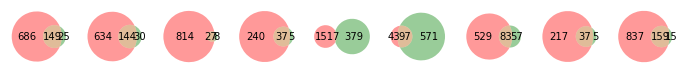

In [50]:
l = len(lo_escore_hi_dist)
f, ax = plt.subplots(1, l, figsize=(12, 4))

for i in xrange(l):
    TFa = lo_escore_hi_dist[i][0]
    TFb = lo_escore_hi_dist[i][1]
    venn2([bind_net[TFa], bind_net[TFb]], set_labels = ('', ''), ax=ax[i])
#     venn2([bind_net[TFa], bind_net[TFb]], set_labels = (TFa, TFb), ax=ax[i])

In [59]:
l = len(lo_escore_hi_dist)

for i in xrange(l):
    TFa = lo_escore_hi_dist[i][0]
    TFb = lo_escore_hi_dist[i][1]
    
    gd = session.query(GeneData).filter(GeneData.uniprot == TFa)[0]
    print(gd.fasta.split('\n')[0])
    gd = session.query(GeneData).filter(GeneData.uniprot == TFb)[0]
    print(gd.fasta.split('\n')[0])
    print('')

>sp|Q62231|SIX1_MOUSE Homeobox protein SIX1 OS=Mus musculus GN=Six1 PE=1 SV=2
>tr|Q9Y1P6|Q9Y1P6_DROME GM13131p OS=Drosophila melanogaster GN=Six4 PE=2 SV=1

>sp|Q62233|SIX3_MOUSE Homeobox protein SIX3 OS=Mus musculus GN=Six3 PE=1 SV=2
>tr|Q9Y1P6|Q9Y1P6_DROME GM13131p OS=Drosophila melanogaster GN=Six4 PE=2 SV=1

>sp|Q03125|NRG1_YEAST Transcriptional regulator NRG1 OS=Saccharomyces cerevisiae (strain ATCC 204508 / S288c) GN=NRG1 PE=1 SV=1
>sp|P38082|NRG2_YEAST Probable transcriptional regulator NRG2 OS=Saccharomyces cerevisiae (strain ATCC 204508 / S288c) GN=NRG2 PE=1 SV=1

>sp|P34056|AP2A_MOUSE Transcription factor AP-2-alpha OS=Mus musculus GN=Tfap2a PE=1 SV=2
>sp|Q6VUP9|AP2E_MOUSE Transcription factor AP-2-epsilon OS=Mus musculus GN=Tfap2e PE=1 SV=2

>sp|Q5RJ54|ZSC26_MOUSE Zinc finger and SCAN domain-containing protein 26 OS=Mus musculus GN=Zscan26 PE=2 SV=1
>tr|Q3UHV1|Q3UHV1_MOUSE Putative uncharacterized protein OS=Mus musculus GN=Zfp105 PE=2 SV=1

>sp|Q8VDL9|GLIS2_MOUSE Zinc finge

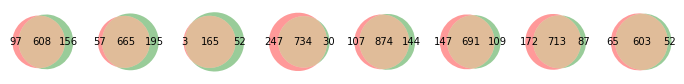

In [51]:
l = len(hi_escore_lo_dist)
f, ax = plt.subplots(1, l, figsize=(12, 4))

for i in xrange(l):
    TFa = hi_escore_lo_dist[i][0]
    TFb = hi_escore_lo_dist[i][1]
    venn2([bind_net[TFa], bind_net[TFb]], set_labels = ('', ''), ax=ax[i])
#     venn2([bind_net[TFa], bind_net[TFb]], set_labels = (TFa, TFb), ax=ax[i])

In [60]:
l = len(hi_escore_lo_dist)

for i in xrange(l):
    TFa = hi_escore_lo_dist[i][0]
    TFb = hi_escore_lo_dist[i][1]
    
    gd = session.query(GeneData).filter(GeneData.uniprot == TFa)[0]
    print(gd.fasta.split('\n')[0])
    gd = session.query(GeneData).filter(GeneData.uniprot == TFb)[0]
    print(gd.fasta.split('\n')[0])
    print('')

>sp|Q06348|PRRX2_MOUSE Paired mesoderm homeobox protein 2 OS=Mus musculus GN=Prrx2 PE=2 SV=2
>sp|O35602|RX_MOUSE Retinal homeobox protein Rx OS=Mus musculus GN=Rax PE=2 SV=2

>sp|O35137|ALX4_MOUSE Homeobox protein aristaless-like 4 OS=Mus musculus GN=Alx4 PE=1 SV=1
>sp|O09113|OTP_MOUSE Homeobox protein orthopedia OS=Mus musculus GN=Otp PE=2 SV=1

>sp|Q91ZD1|OSR2_MOUSE Protein odd-skipped-related 2 OS=Mus musculus GN=Osr2 PE=1 SV=1
>sp|Q9WVG7|OSR1_MOUSE Protein odd-skipped-related 1 OS=Mus musculus GN=Osr1 PE=2 SV=1

>sp|P63013|PRRX1_MOUSE Paired mesoderm homeobox protein 1 OS=Mus musculus GN=Prrx1 PE=1 SV=1
>sp|O35602|RX_MOUSE Retinal homeobox protein Rx OS=Mus musculus GN=Rax PE=2 SV=2

>sp|P63013|PRRX1_MOUSE Paired mesoderm homeobox protein 1 OS=Mus musculus GN=Prrx1 PE=1 SV=1
>sp|P70390|SHOX2_MOUSE Short stature homeobox protein 2 OS=Mus musculus GN=Shox2 PE=2 SV=1

>sp|P09092|HXA6_MOUSE Homeobox protein Hox-A6 OS=Mus musculus GN=Hoxa6 PE=2 SV=2
>sp|P23463|HXD8_MOUSE Homeobox protei

<matplotlib_venn._common.VennDiagram instance at 0x7f17621b0ef0>

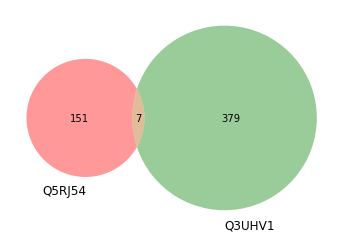

In [52]:
TFa = lo_escore_hi_dist[4][0]
TFb = lo_escore_hi_dist[4][1]
venn2([bind_net[TFa], bind_net[TFb]], set_labels = (TFa, TFb))

In [56]:
gd = session.query(GeneData).filter(GeneData.uniprot == 'Q5RJ54')[0]
print(gd.fasta.split('\n')[0])
gd = session.query(GeneData).filter(GeneData.uniprot == 'Q3UHV1')[0]
print(gd.fasta.split('\n')[0])

>sp|Q5RJ54|ZSC26_MOUSE Zinc finger and SCAN domain-containing protein 26 OS=Mus musculus GN=Zscan26 PE=2 SV=1
>tr|Q3UHV1|Q3UHV1_MOUSE Putative uncharacterized protein OS=Mus musculus GN=Zfp105 PE=2 SV=1


In [62]:
gd = session.query(GeneData).filter(GeneData.uniprot == 'Q5RJ54')[0]
print(gd.fasta)

>sp|Q5RJ54|ZSC26_MOUSE Zinc finger and SCAN domain-containing protein 26 OS=Mus musculus GN=Zscan26 PE=2 SV=1
MALALIHPSKRAYSLAPLNLKEELQGFKVQGDRKGVGQEPLCKQFRQLRYEESTGPREVLRRLRELCRQWLRPETHSKEQILELLVLEQFLTILPRDLQVQVLEHHPETGEELVGILEDLQLDRGKAGEQKDSAQRSRPTVLVGEPAPRREAREQPGCALPQKPEERGKETRSENGNLIAGTDSCGRMESSCTMTEPIEAQCEDLSLKKNPAMPKEKTNSQCLETKERLVQNSGLIEHDRAHTGEMSWESVGSQSSVAADHQEISKDKGHPCQECGKVFQRSSHLIRHQKIHLGEKPYQCKECGKVFSQNAGLLEHLRIHTGEKPYLCIHCGKNFRRSSHLNRHQKIHSQDEPRECKECGKTFSRALLLTHHQRVHGRSKRHHCNECGKAFSLTSDLIRHHRIHTGEKPFKCNVCQKAFRLNSHLDQHVRIHNEEKPYKCSECNEAFRQKSGLFQHQRHHHKSKLA


In [61]:
gd = session.query(GeneData).filter(GeneData.uniprot == 'Q3UHV1')[0]
print(gd.fasta)

>tr|Q3UHV1|Q3UHV1_MOUSE Putative uncharacterized protein OS=Mus musculus GN=Zfp105 PE=2 SV=1
MTTELKETMGRASWDPEKVKMEEDDESVISQASSQQVYYENDKDCAPGEGPYGSISVSEDEEKGQEMFREMAVVLKATQEAAAASPFGSYSLAGTLAESQILELHGKPTPTGAKSKNLELLIPKKEISDDSEKPPMILGRIQKGDLQGPELGESCEKGNVLKGLRIKEEKGDLGEATVKDCPLSESFRDEEESKKSRGKYSLRSTPGKNQKIQPGQKPFTCSECGKGFSQSANLVVHQRIHTGEKPFECHECGKAFIQSANLVVHQRIHTGQKPYVCGKCGKAFTQSSNLTVHQKIHSLEKTFKCSECEKAFSYSSQLARHQKVHITEKCYECNECGKTFTRSSNLIVHQRIHTGEKPFACSDCGKAFTQSANLIVHQRSHTGEKPYKCKDCEKAFSCFSHLIVHQRIHTAEKPYDCSECGKAFSQLSCLIVHQRIHSGDLPYVCNECGKAFTCSSYLLIHQRIHNGEKPYSCNECGKAFRQRSSLTVHQRTHTGEKPYECAKCGAAFISNSHLMRHHRTHLVE
